#### regression1_linear      p.162

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 讀入資料
train = np.loadtxt('click.csv', delimiter=',', skiprows=1)
print(train)

[[235. 591.]
 [216. 539.]
 [148. 413.]
 [ 35. 310.]
 [ 85. 308.]
 [204. 519.]
 [ 49. 325.]
 [ 25. 332.]
 [173. 498.]
 [191. 498.]
 [134. 392.]
 [ 99. 334.]
 [117. 385.]
 [112. 387.]
 [162. 425.]
 [272. 659.]
 [159. 400.]
 [159. 427.]
 [ 59. 319.]
 [198. 522.]]


In [3]:
train_x = train[:, 0]  # 第 0 行，取全部  -- x 軸


In [4]:
print(train_x)

[235. 216. 148.  35.  85. 204.  49.  25. 173. 191. 134.  99. 117. 112.
 162. 272. 159. 159.  59. 198.]


In [5]:
train_y = train[:, 1]  # 第 1 行，取全部  -- y 軸

In [6]:
print(train_y)

[591. 539. 413. 310. 308. 519. 325. 332. 498. 498. 392. 334. 385. 387.
 425. 659. 400. 427. 319. 522.]


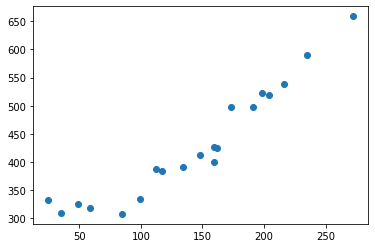

In [7]:
# 畫圖
plt.plot(train_x, train_y, 'o')
plt.show()

### 預測函數(p.30)： $$f_\theta(x) = \theta_0 + \theta_1x $$

###      $$ \theta_0：截距 \;\;\; \theta_1：斜率  $$

###  目標函數(p.33)： $$E(\theta) = \frac{1}{2}\sum_{i=1}^n{\left({y^{(i)} - f_\theta(x^{(i)}) }\right)}^2   $$

In [8]:
# 初始化參數
theta0 = np.random.rand()
theta1 = np.random.rand()

In [9]:
print(theta0)

0.3176021285593251


In [10]:
print(theta1)

0.75344175271932


In [11]:
# 預測函數
def f(x):
    return theta0 + theta1 * x

# 目標函數
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

### 標準化或 Z-score 正規化  $$ z^{(i)} = \frac{x^{(i)} - \mu}{\sigma} $$

In [12]:
# 標準化
mu = train_x.mean()    # 平均數
sigma = train_x.std()  # 標準差

In [13]:
print(mu)

141.6


In [14]:
print(sigma)

66.98537153737374


In [15]:
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)
print(train_z)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]


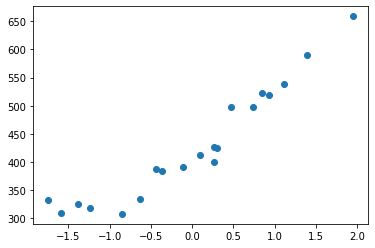

In [16]:
plt.plot(train_z, train_y, 'o')
plt.show()

# 標準化後，x 軸的刻度變小了

### $$ \theta_0 := \theta_0 - \eta\sum_{i=1}^n{\left(f_\theta(x^{(i)}) - {y^{(i)}}\right)}  $$

### $$ \theta_1 := \theta_1 - \eta\sum_{i=1}^n{\left(f_\theta(x^{(i)}) - {y^{(i)}}\right)}x^{(i)} $$

In [17]:
# 學習率，自己設
ETA = 1e-3

# 誤差的差分
diff = 1

# 更新次數
count = 0

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
error = E(train_z, train_y)
while diff > 1e-2:
    # 將更新結果儲存於臨時變數
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    
    # 更新參數
    theta0 = tmp_theta0
    theta1 = tmp_theta1
    
    # 計算與前一項誤差的差分
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    
    # 輸出日誌
    count += 1
    log = '{}次: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))


1次: theta0 = 8.894, theta1 = 2.608, 差分 = 76228.1038
2次: theta0 = 17.299, theta1 = 4.425, 差分 = 73209.4709
3次: theta0 = 25.536, theta1 = 6.206, 差分 = 70310.3758
4次: theta0 = 33.609, theta1 = 7.952, 差分 = 67526.0849
5次: theta0 = 41.519, theta1 = 9.662, 差分 = 64852.0520
6次: theta0 = 49.272, theta1 = 11.339, 差分 = 62283.9107
7次: theta0 = 56.870, theta1 = 12.982, 差分 = 59817.4679
8次: theta0 = 64.315, theta1 = 14.591, 差分 = 57448.6961
9次: theta0 = 71.612, theta1 = 16.169, 差分 = 55173.7278
10次: theta0 = 78.763, theta1 = 17.715, 差分 = 52988.8481
11次: theta0 = 85.770, theta1 = 19.231, 差分 = 50890.4898
12次: theta0 = 92.638, theta1 = 20.716, 差分 = 48875.2264
13次: theta0 = 99.368, theta1 = 22.171, 差分 = 46939.7674
14次: theta0 = 105.964, theta1 = 23.597, 差分 = 45080.9526
15次: theta0 = 112.428, theta1 = 24.995, 差分 = 43295.7469
16次: theta0 = 118.762, theta1 = 26.364, 差分 = 41581.2353
17次: theta0 = 124.970, theta1 = 27.707, 差分 = 39934.6184
18次: theta0 = 131.053, theta1 = 29.022, 差分 = 38353.2075
19次: theta0 = 137.01

In [18]:
# 繪圖來確認
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [19]:
print(f(x))   # f(x) = theta0 + theta1 * x

[148.66108707 154.32450454 159.98792201 165.65133948 171.31475695
 176.97817442 182.64159189 188.30500936 193.96842683 199.6318443
 205.29526177 210.95867925 216.62209672 222.28551419 227.94893166
 233.61234913 239.2757666  244.93918407 250.60260154 256.26601901
 261.92943648 267.59285395 273.25627142 278.91968889 284.58310636
 290.24652384 295.90994131 301.57335878 307.23677625 312.90019372
 318.56361119 324.22702866 329.89044613 335.5538636  341.21728107
 346.88069854 352.54411601 358.20753348 363.87095096 369.53436843
 375.1977859  380.86120337 386.52462084 392.18803831 397.85145578
 403.51487325 409.17829072 414.84170819 420.50512566 426.16854313
 431.8319606  437.49537807 443.15879555 448.82221302 454.48563049
 460.14904796 465.81246543 471.4758829  477.13930037 482.80271784
 488.46613531 494.12955278 499.79297025 505.45638772 511.11980519
 516.78322267 522.44664014 528.11005761 533.77347508 539.43689255
 545.10031002 550.76372749 556.42714496 562.09056243 567.7539799
 573.4173973

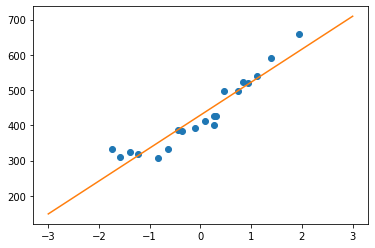

In [20]:
plt.plot(train_z, train_y, 'o')  # 點 
plt.plot(x, f(x))  # 直線
plt.show()

In [21]:
f(standardize(100))

370.9671371349919

In [22]:
f(standardize(200))

510.46981678354456

In [23]:
f(standardize(300))

649.9724964320973

### 多項式迴歸的程式    p.165

In [33]:
# 初始化參數
theta = np.random.rand(3)
print(theta)

[0.69804598 0.05969121 0.02888651]


In [34]:
# 建立學習資料的矩陣
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

X = to_matrix(train_z)
print(X)

[[ 1.          1.39433428  1.94416809]
 [ 1.          1.11069026  1.23363286]
 [ 1.          0.09554325  0.00912851]
 [ 1.         -1.59139223  2.53252924]
 [ 1.         -0.8449606   0.71395842]
 [ 1.          0.93154667  0.8677792 ]
 [ 1.         -1.38239138  1.91100592]
 [ 1.         -1.74067856  3.02996185]
 [ 1.          0.46875906  0.21973506]
 [ 1.          0.73747445  0.54386856]
 [ 1.         -0.11345761  0.01287263]
 [ 1.         -0.63595975  0.4044448 ]
 [ 1.         -0.36724436  0.13486842]
 [ 1.         -0.44188752  0.19526458]
 [ 1.          0.3045441   0.09274711]
 [ 1.          1.94669369  3.78961632]
 [ 1.          0.25975821  0.06747433]
 [ 1.          0.25975821  0.06747433]
 [ 1.         -1.23310505  1.52054807]
 [ 1.          0.84197488  0.70892169]]


In [35]:
# 預測函數
def f(x):
    return np.dot(x, theta)

In [40]:
# 誤差的差分
diff = 1

# 重複學習
error = E(X, train_y)
while diff > 1e-2:
    # 更新參數
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 計算與前一項誤差的差分
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

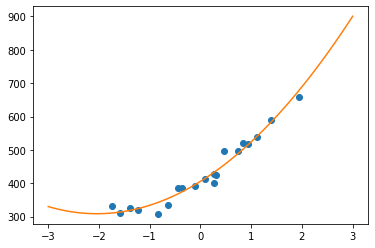

In [41]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()